# EDA on Haberman's Survival Data Set


(Information obtained from Kaggle.com)

The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

In [15]:
#Importing all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plb

In [3]:
#Loading Haberman's Survival Data Set into a DataFrame
hab = pd.read_csv("haberman.csv")
print(hab)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


From the above given information, it's evidnet that the dataset has 306 rows and 4 columns.

Hence, the shape of the Data set is (306,4)

**Attribute Information:(Kaggle.com)**


1. Age = Age of patient at time of operation (numerical)
2. Year = Patient's year of operation (year - 1900, numerical)
3. Nodes = Number of positive axillary nodes detected (numerical)
4. Status = Survival status (class attribute)
   * 1 = the patient survived 5 years or longer
   * 2 = the patient died within 5 year 












In [4]:
print(hab.isnull())

       age   year  nodes  status
0    False  False  False   False
1    False  False  False   False
2    False  False  False   False
3    False  False  False   False
4    False  False  False   False
..     ...    ...    ...     ...
301  False  False  False   False
302  False  False  False   False
303  False  False  False   False
304  False  False  False   False
305  False  False  False   False

[306 rows x 4 columns]


**Observation:**

*The given Data set doesn't have any Missing Attribute Values.*

In [6]:
 hab["status"].value_counts() 

1    225
2     81
Name: status, dtype: int64

In [7]:
import math
hab['status'].value_counts(normalize=True) * 100  #Finding Percentage 

1    73.529412
2    26.470588
Name: status, dtype: float64

It's seen that out of the 306 patients who underwent breast cancer surgery, unfortunately only 26.47%(81 people) of people didn't make it for 5 years or more.

# 2-D Scatter Plot

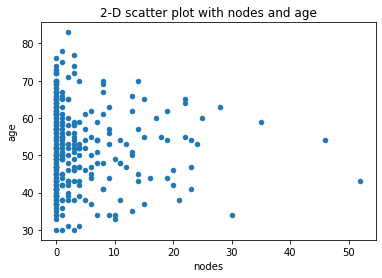

In [17]:
hab.plot(kind = "scatter", x = "nodes", y = "age")
plt.title("2-D scatter plot with nodes and age")
plt.show()

From the above given plots, there's no enough information to make any significant findings. 

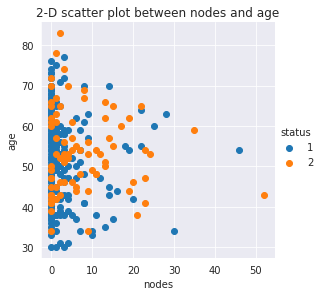

In [19]:
sns.set_style("darkgrid")
sns.FacetGrid(hab,hue = "status", height = 4).map(plt.scatter, "nodes", "age").add_legend()
plt.title("2-D scatter plot between nodes and age")
plt.show()

- The status 1 and 2 are scatterted randomly across all the age groups for the given nodes.

Even after plotting the seaborn 2-D scatter plot, the output observed is not convincing enough to make any observations. 

# Pair plot

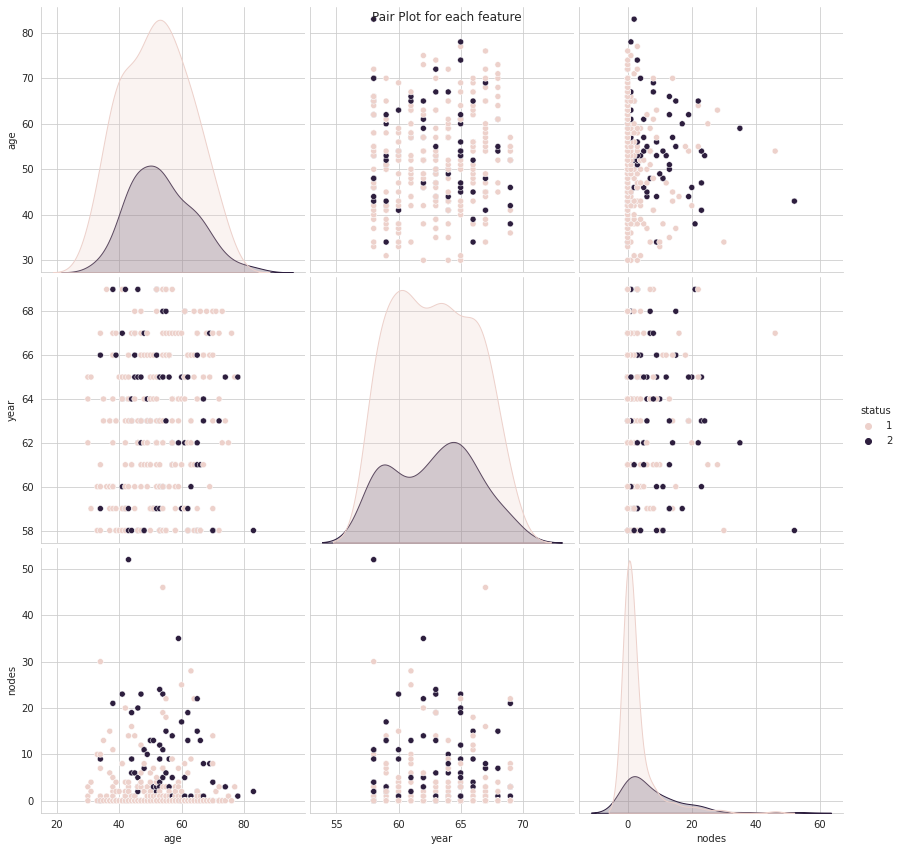

In [21]:
sns.set_style("whitegrid")
sns.pairplot(hab,hue = "status",height = 4)
plt.suptitle('Pair Plot for each feature')
plt.show()

There's no plot in which a linearly seperable line can be drawn to make observations because the labels(classes) are overlapping across all the variables(Features).

# 1-D Scater Plot for just 1 feature

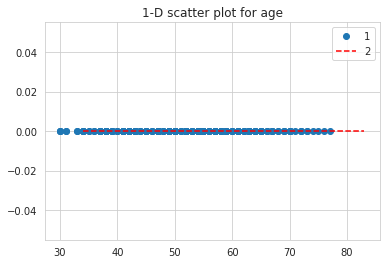

In [35]:
hab_alive = hab.loc[hab["status"] == 1]
hab_dead = hab.loc[hab["status"] == 2]
plt.plot(hab_alive["age"], np.zeros_like(hab_alive['age']), 'o')
plt.plot(hab_dead["age"], np.zeros_like(hab_dead['age']), 'r--')

plt.legend('12')
plt.title('1-D scatter plot for age')
plt.show()

# Histogram and PDF

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


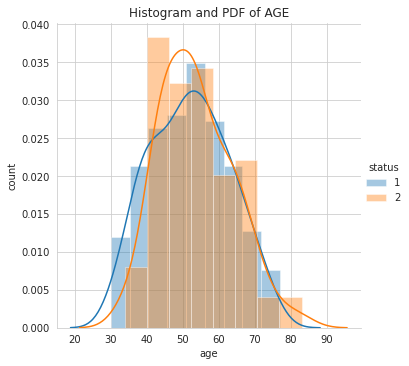

In [43]:
sns.FacetGrid(hab, hue="status", height=5) .map(sns.distplot, "age").add_legend();
plt.title('Histogram and PDF of AGE')
plt.ylabel('count')
plt.show()

- The data for both the class range between age 30 to 85 and class have the mean approximatly equal.

- Major overlapping is observed, which tells us that survival chances does not depend on the age of the person.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


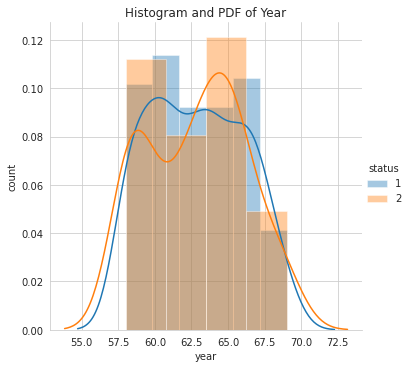

In [45]:
sns.FacetGrid(hab, hue="status", height=5).map(sns.distplot, "year").add_legend();
plt.title('Histogram and PDF of Year')
plt.ylabel('count')
plt.show()

- Considering "Year" both the classes are overlaped and we cannot differentiate them very easily. 
- But, we can see that the most number of unsuccesful operation took place between 1960 to 1965.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


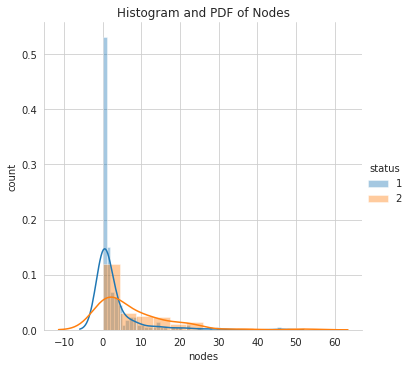

In [46]:
sns.FacetGrid(hab, hue="status", height=5).map(sns.distplot, "nodes").add_legend();
plt.title('Histogram and PDF of Nodes')
plt.ylabel('count')
plt.show()

This graph gives us notable outputs, 
- the patients with 0 positive auxillary nodes have more than 50% of survival chance
- Patients 1 or less positive auxillary nodes have a good survial chance.
- Patients with more than 20 auxillary nodes are not likely to survive. 


# CDF 

PDF of Status 1:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Edges 1:  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
********************************************************
PDF of Status 2: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Edges 2:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


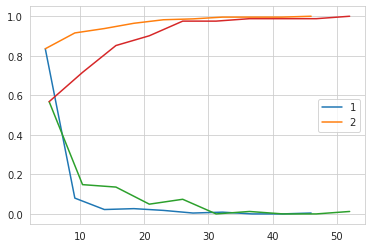

In [53]:
counts, bin_edges = np.histogram(hab_alive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF of Status 1: ", pdf)
print("Edges 1: ", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

print("********************************************************")
counts2, bin_edges2 = np.histogram(hab_dead['nodes'], bins=10, 
                                 density = True)
pdf2 = counts2/(sum(counts2))
print("PDF of Status 2:",pdf2)
print("Edges 2: ", bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:], cdf2)
plt.legend('12')
plt.show()

# Box Plot

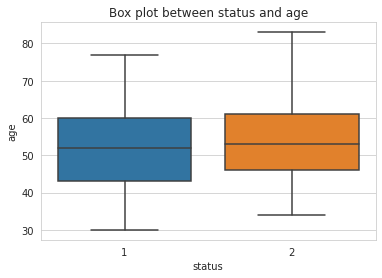

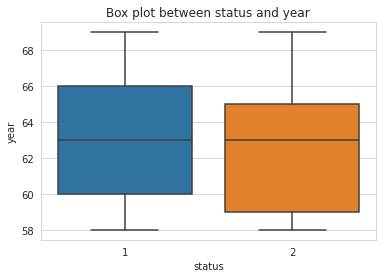

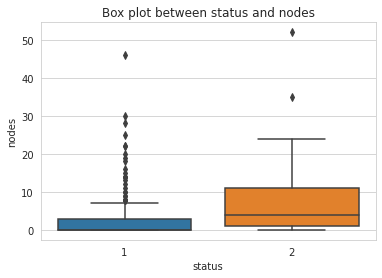

In [55]:
sns.boxplot(x='status',y='age',data=hab)
plt.title("Box plot between status and age")
plt.show()
sns.boxplot(x='status',y='year',data=hab)
plt.title("Box plot between status and year")
plt.show()
sns.boxplot(x='status',y='nodes',data=hab)
plt.title("Box plot between status and nodes")
plt.show()

# Violin plot 

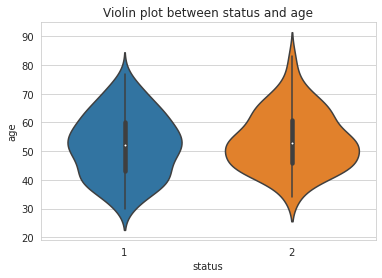

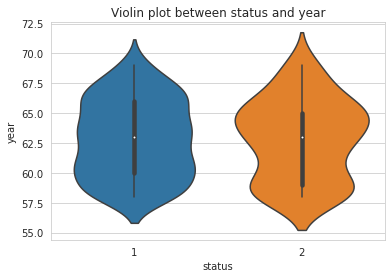

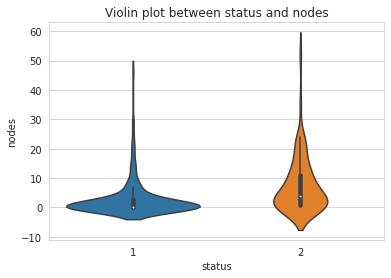

In [57]:
sns.violinplot(x="status",y="age",data = hab,height = 10)
plt.title("Violin plot between status and age")
plt.show()
sns.violinplot(x="status",y="year",data = hab,height = 10)
plt.title("Violin plot between status and year")
plt.show()
sns.violinplot(x="status",y="nodes",data = hab,height = 10)
plt.title("Violin plot between status and nodes")
plt.show()

Final Observations:


- Patients with more than 1 auxillary nodes are have very less chance to survival.
- In the year of 1965, there were comparitively more people who got operated and did not make it past the next 5 years. 
- In the group 45 to 65 there were comparitively more people who did not survive. Anyways, age of the patient alone is not a deterministic parameter the survival of a patient.